# Plotting Cross-Validated Predictions

展示如何使用 cross_val_predict 将预测 errors 可视化展示.

In [4]:
# %load ../common_import.py
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

In [12]:
lr = linear_model.LinearRegression()
boston = datasets.load_boston()
# 将数据转成 DataFrame 方便查看
target = pd.DataFrame(boston.target)
data = pd.DataFrame(boston.data)

In [14]:
 predicted = cross_val_predict(lr, data, target, cv=10)

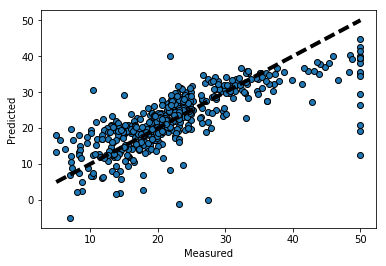

In [21]:
fig, ax = plt.subplots()
ax.scatter(target, predicted, edgecolors=(0, 0, 0))
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [25]:
target['predicted'] = predicted

KeyError: '0'

In [38]:
target = target.rename(columns={0:'target'})

In [43]:
target['error'] = target['target'] - target['predicted']
target.head()

,target,predicted,error
0,24.0,30.053132,-6.053132
1,21.6,24.735976,-3.135976
2,34.7,30.364361,4.335639
3,33.4,28.321366,5.078634
4,36.2,27.545057,8.654943


(array([   2.,   10.,  125.,  256.,   81.,   20.,    5.,    3.,    3.,    1.]),
 array([-20.27045931, -14.48997257,  -8.70948583,  -2.92899909,
          2.85148765,   8.63197439,  14.41246113,  20.19294787,
         25.97343461,  31.75392135,  37.53440809]),
 <a list of 10 Patch objects>)

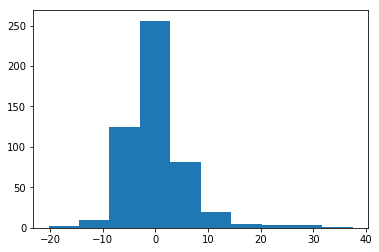

In [44]:
fig, ax = plt.subplots()
ax.hist(target['error'])

In [ ]:
# TODO 数据 normalization